In [219]:
import yfinance as yf
import requests
import pandas as pd
import gradio as gr
import numpy as np


**Data Collection
Independent variable - USD - INR**

In [221]:
usd_inr = yf.download('USDINR=X', start='2024-01-01', end='2024-12-31', interval='1wk')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [222]:
type(usd_inr)

pandas.core.frame.DataFrame

In [223]:
usd_inr.head()

Price,Close,High,Low,Open,Volume
Ticker,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
Date,,,,,
2024-01-01,83.240601,83.360298,83.035004,83.248596,0
2024-01-08,83.076103,83.189697,82.779099,83.191101,0
2024-01-15,83.160599,83.230797,82.809998,82.872101,0
2024-01-22,83.146103,83.222504,81.513702,83.124702,0
2024-01-29,82.927597,83.212601,82.815002,83.121300,0


In [224]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2024-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, USDINR=X)   53 non-null     float64
 1   (High, USDINR=X)    53 non-null     float64
 2   (Low, USDINR=X)     53 non-null     float64
 3   (Open, USDINR=X)    53 non-null     float64
 4   (Volume, USDINR=X)  53 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [226]:
usd_inr.reset_index(inplace=True)

In [227]:
# Keep only relevant columns
usd_inr = usd_inr[['Date', 'Close']]
usd_inr.columns = ['Date', 'USD_INR']

In [228]:
usd_inr.head()

,Date,USD_INR
0,2024-01-01,83.240601
1,2024-01-08,83.076103
2,2024-01-15,83.160599
3,2024-01-22,83.146103
4,2024-01-29,82.927597


***Dependent Variable y  Gold rate***

In [230]:
 gold_data_inr = yf.download('XAU', start='2024-01-01', end='2024-12-31', interval='1wk')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['XAU']: YFPricesMissingError('possibly delisted; no price data found  (1wk 2024-01-01 -> 2024-12-31)')


***Web scraping using BeautifulSoup***

In [232]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 

In [233]:
# URL of the page
url = "https://www.exchange-rates.org/precious-metals/gold-price/india/2024"

# Send a request to fetch the page content
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Extract tables into DataFrames
dfs = []
for table in tables:
    df = pd.read_html(str(table))[0]
    dfs.append(df)

# Print all extracted tables
# for i, df in enumerate(dfs):
#     print(f"Table {i+1}:")
#     print(df)
#     print("\n")

C:\Users\mani2\AppData\Local\Temp\ipykernel_21212\1147665682.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\mani2\AppData\Local\Temp\ipykernel_21212\1147665682.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\mani2\AppData\Local\Temp\ipykernel_21212\1147665682.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\mani2\AppData\Local\Temp\ipykernel_21212\1147665682.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read fr

In [234]:
 df = pd.read_html(str(table))[0]

C:\Users\mani2\AppData\Local\Temp\ipykernel_21212\4031098755.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


***Project***

In [236]:
gold_data=pd.read_csv('Gold vs USDINR.csv')

In [237]:
gold_data['Goldrate']= gold_data['Goldrate'].replace('₹', '', regex=True).replace(',','', regex=True).astype(float)

In [238]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      53 non-null     object 
 1   USD_INR   53 non-null     float64
 2   Goldrate  53 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


****Data Analysis****

In [240]:
gold_data.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,5066.31
1,2024-01-08,83.076103,4966.31
2,2024-01-15,83.160599,5015.33
3,2024-01-22,83.146103,4950.84
4,2024-01-29,82.927597,4976.77


In [241]:
gold_data.describe().round(2)

,USD_INR,Goldrate
count,53.00,53.00
mean,83.72,5891.04
std,0.64,587.66
min,82.75,4934.99
25%,83.30,5543.85
50%,83.54,5874.86
75%,83.99,6507.66
max,85.79,6795.35


In [242]:
gold_data['Goldrate']= gold_data['Goldrate'].replace('₹', '', regex=True).replace(',','', regex=True).astype(float)

EDA
Handle missing values - No
Handle Imbalanced dataset - No
Handle outliers - Seen
Encode categorical features - No
Normalization vs Standardisation - standardize

In [244]:
import seaborn as sns

<Axes: ylabel='USD_INR'>

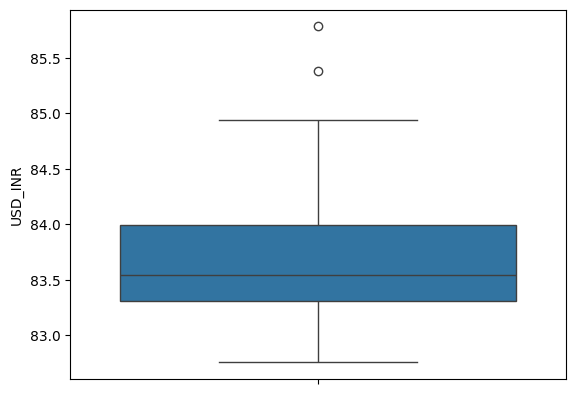

In [245]:
sns.boxplot(gold_data['USD_INR'])

In [246]:
gold_data['USD_INR'].min()

np.float64(82.75229645)

<Axes: xlabel='USD_INR', ylabel='Goldrate'>

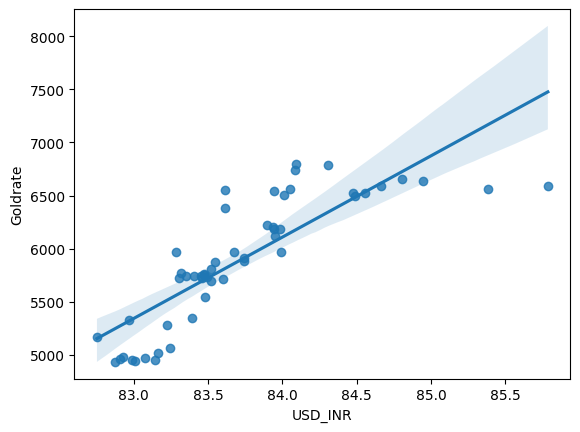

In [247]:
sns.regplot(x='USD_INR', y='Goldrate', data=gold_data)

In [248]:
X = gold_data[['USD_INR']]
y = gold_data[['Goldrate']]

In [249]:
X

,USD_INR
0,83.240601
1,83.076103
2,83.160599
3,83.146103
4,82.927597
5,82.985298
6,83.009598
7,82.872299
8,82.910400
9,82.752296


In [250]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [251]:
X_train.shape, X_test.shape

((47, 1), (6, 1))

In [252]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [253]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [254]:
X_test_scaled

array([[-0.37619593],
       [ 0.53097266],
       [ 1.31302272],
       [-0.49602609],
       [ 0.58955971],
       [-1.12965796]])

In [255]:
X_train_scaled

array([[-0.4753469 ],
       [ 1.91603897],
       [-0.87974106],
       [ 0.36700952],
       [-0.36423189],
       [-1.24606136],
       [-0.33998365],
       [-1.09189238],
       [ 0.28432837],
       [-1.21933493],
       [-0.15146399],
       [-0.17182302],
       [ 0.92354506],
       [ 0.35503362],
       [ 1.69379708],
       [-0.25979254],
       [-1.49178076],
       [-0.63775672],
       [ 0.04932799],
       [ 0.34602205],
       [-0.40604082],
       [-0.7546344 ],
       [-0.7328762 ],
       [ 1.20624748],
       [-0.30097304],
       [ 0.43025651],
       [ 0.461963  ],
       [ 0.05011057],
       [ 1.18371856],
       [-0.98853205],
       [-0.60807784],
       [-0.85721215],
       [ 0.36342862],
       [ 0.42186152],
       [-0.29537637],
       [ 1.48242836],
       [-1.16027359],
       [-0.371536  ],
       [-0.39283176],
       [ 3.22402082],
       [-0.66169667],
       [-1.30527686],
       [ 0.57448905],
       [-0.56394486],
       [-0.05883454],
       [ 2

In [256]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()

In [257]:
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [258]:
regressor.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [259]:
regressor.coef_

array([[469.20755762]])

In [260]:
regressor.intercept_

array([5878.57340426])

In [262]:
# y = mx+b
m = regressor.coef_[0][0]
b = regressor.intercept_[0]

In [266]:
m,b

(np.float64(469.2075576153299), np.float64(5878.573404255313))

In [270]:
x_train_predict = regressor.predict(X_train_scaled)

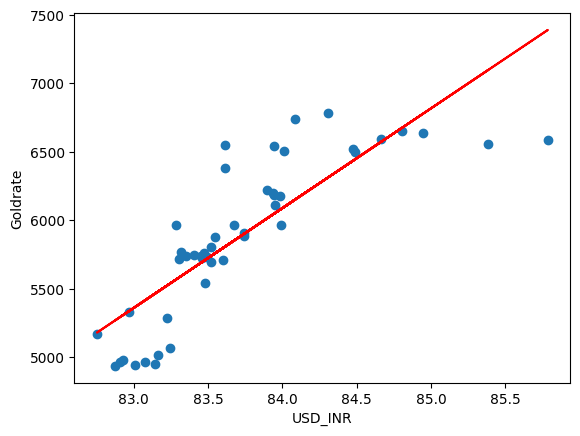

In [272]:
plt.scatter(X_train,y_train)
plt.plot(X_train, x_train_predict, color='r')
plt.xlabel("USD_INR")
plt.ylabel("Goldrate")
plt.show()

In [273]:
X_test_predicted = regressor.predict(X_test_scaled)

In [274]:
X_test_predicted

array([[5702.05943009],
       [6127.70978702],
       [6494.65358787],
       [5645.83421639],
       [6155.1992781 ],
       [5348.52935023]])

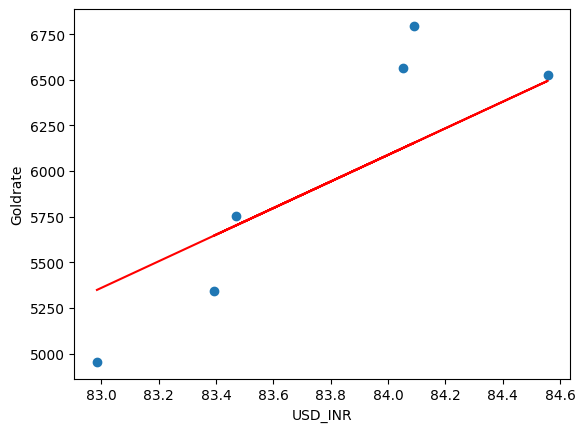

In [275]:
plt.scatter(X_test,y_test)
plt.plot(X_test, X_test_predicted, color='r')
plt.xlabel("USD_INR")
plt.ylabel("Goldrate")
plt.show()

In [276]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, X_test_predicted)

141948.22993388725

In [277]:
from sklearn.model_selection import RandomizedSearchCV
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [278]:
search = RandomizedSearchCV(regressor, param_space, n_iter=50, cv=5)

In [279]:
search.fit(X_train_scaled, y_train)

C:\Users\mani2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [280]:
search.best_params_


{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [281]:
tuned_model = LinearRegression(positive= True, n_jobs= 1, fit_intercept= True, copy_X= True)

In [282]:
tuned_model.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=1, positive=True)

In [284]:
tuned_model.coef_

array([[469.20755762]])

In [285]:
tuned_model.intercept_

array([5878.57340426])

In [286]:
import numpy as np

In [287]:
import pickle

In [288]:
pickle.dump(regressor, open('regressor_model.pkl', 'wb'))

In [289]:
regressor_reloaded = pickle.load(open('regressor_model.pkl', 'rb'))

In [292]:
pickle.dump(scaler, open('scaler_model.pkl', 'wb'))

In [296]:
scaler_reloaded=pickle.load(open('scaler_model.pkl', 'rb'))

In [300]:
import gradio as gr

In [301]:
def calculate_goldrate(USD_INR):
    scaler_input=scaler.transform(np.array(USD_INR).reshape(1,-1))
    return regressor.predict(scaler_input)[0][0].round(2)
   

In [302]:
 calculate_goldrate(80)

C:\Users\mani2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(3171.57)

In [303]:

demo = gr.Interface(
    fn=calculate_goldrate,
    inputs=["number"],
    outputs=["number"],
    title="How much is 1g of gold in India NOW?"
)

demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7867

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
